In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import gala.coordinates as gc
import h5py

In [3]:
plt.style.use('notebook')

In [4]:
# read profiles
t = Table.read('../data/combined_params_1d.fits')
ind_sort = np.argsort(t['phi1'])
t = t[ind_sort]

In [31]:
# read members
tp = Table.read('../data/members_only.fits')

In [32]:
ceq = coord.SkyCoord(ra=tp['ra']*u.deg, dec=tp['dec']*u.deg, frame='icrs')
cpal = ceq.transform_to(gc.Pal5)

wangle = 180*u.deg

In [29]:
row_labels = ['$\phi_2$ [deg]', '$\phi_2$ [deg]', '$\Delta\phi_2$ [deg]', 'N', '$\sigma$ [deg]']

In [114]:
# polynomial along leading
nlead = 2
ind_lead = t['phi1']>=0
plead = np.polyfit(t['phi1'][ind_lead], t['phi2'][ind_lead], nlead)
polylead = np.poly1d(plead)
xlead = np.linspace(0,10,30)
ylead = polylead(xlead)

# polynomial along trailing
ntrail = 2
ind_trail = t['phi1']<=0
ptrail = np.polyfit(t['phi1'][ind_trail], t['phi2'][ind_trail], ntrail)
polytrail = np.poly1d(ptrail)
xtrail = np.linspace(-17,0,30)
ytrail = polytrail(xtrail)

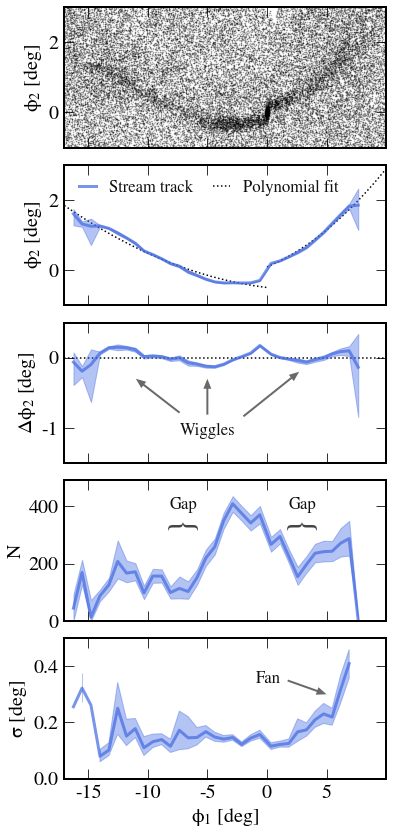

In [139]:
fig, ax = plt.subplots(5,1,figsize=(6,12), sharex='col', sharey='row')

plt.sca(ax[0])
plt.plot(cpal.phi1.wrap_at(wangle), cpal.phi2, 'k.', ms=3, mec='none', alpha=0.3, rasterized=True)
plt.xlim(-17,10)
plt.ylim(-1,3)

plt.sca(ax[1])
plt.plot(t['phi1'], t['phi2'], '-', color='royalblue', lw=3, alpha=0.7, zorder=1, label='Stream track')
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'], t['phi2'] - t['phi2_em'], color='royalblue', alpha=0.4,
                label='')
plt.plot(xlead, ylead, 'k:', label='', zorder=0)
plt.plot(xtrail, ytrail, 'k:', label='Polynomial fit', zorder=0)
plt.ylim(-1,3)
lg = plt.legend(loc=2,ncol=2,frameon=False, fontsize='small', handlelength=1, columnspacing=1.2)
plt.setp(lg.get_texts(), color='#111111')

plt.sca(ax[2])
plt.axhline(0, color='k', ls=':', zorder=0)
polytrack = np.concatenate([polytrail(t['phi1'][t['phi1']<0]), polylead(t['phi1'][t['phi1']>0])])
plt.plot(t['phi1'], t['phi2'] - polytrack,
             '-', color='royalblue', lw=3, alpha=0.7, zorder=20)
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'] - polytrack,
                 t['phi2'] - t['phi2_em'] - polytrack, zorder=1,color='royalblue', alpha=0.4)
plt.ylim(-1.5,0.5)

textpos = (-5,-1.1)
plt.annotate('Wiggles', (2.7,-0.2), textpos, ha='center', fontsize='small', color='#111111',
             bbox=dict(boxstyle='square, pad=0.5', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))
# due to a matplotlib3 bug, the annotation arrow can't be perfectly perpendicular :|
plt.annotate('       ', (-4.999,-0.3), textpos, ha='center', fontsize='small',
             bbox=dict(boxstyle='square, pad=0.5', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))
plt.annotate('       ', (-11,-0.3), textpos, ha='center', fontsize='small',
             bbox=dict(boxstyle='square, pad=0.8', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))

# for x_ in [-13,-4.5,3.5]:
#     plt.axvline(x_)

plt.sca(ax[3])
plt.plot(t['phi1'], t['n'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['n'] + t['n_ep'], t['n'] - t['n_em'], color='royalblue', alpha=0.4)

plt.text(-7,390, 'Gap', ha='center', fontsize='small', color='#111111')
plt.text(3,390, 'Gap', ha='center', fontsize='small', color='#111111')
plt.annotate(r"$\}$", fontsize=34, rotation=90, xy=(-7,330), color='#444444', ha='center')
plt.annotate(r"$\}$", fontsize=34, rotation=90, xy=(3,330), color='#444444', ha='center')
plt.ylim(0,490)

plt.sca(ax[4])
plt.plot(t['phi1'], t['w'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['w'] + t['w_ep'], t['w'] - t['w_em'], color='royalblue', alpha=0.4)
plt.xlabel('$\phi_1$ [deg]')
plt.gca().set_xticks([-15,-10,-5,0,5])
plt.ylim(0,0.5)

plt.text(0.1, 0.34, 'Fan', ha='center', fontsize='small', color='#111111',)
plt.annotate('   ', (5,0.3), (0.1,0.38), ha='center', fontsize='small', color='#111111',
             bbox=dict(boxstyle='square, pad=0.8', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))


for i in range(5):    
    plt.sca(ax[i])
    plt.ylabel(row_labels[i])

plt.tight_layout(h_pad=0, w_pad=0.4)
plt.savefig('../paper/observed_profiles.pdf', dpi=200)